In [1]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yongsukprasertsuk
Your Kaggle Key: ··········


100%|██████████| 306M/306M [00:16<00:00, 19.9MB/s]


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# extract zip file
import zipfile
import os
# local_zip = '/tmp/rockpaperscissors.zip'
base_dir = '/content/rockpaperscissors/rps-cv-images'
# zip_extract = zipfile.ZipFile(local_zip, 'r')
# zip_extract.extractall('/tmp')
# zip_extract.close()

In [5]:
# image augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.4
)

validation_datagen = ImageDataGenerator(
      rescale = 1.0/255,
      validation_split=0.4)

In [7]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    color_mode = "grayscale",
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    color_mode = "grayscale",
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [9]:
# count loss function and optimizer
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

In [ ]:
# callbacks
accuracy_threshold = 98e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'training has been stopped.')
            self.model.stop_training = True

In [10]:
# train data
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
)

Epoch 1/20
25/25 - 12s - loss: 1.0005 - accuracy: 0.4313 - val_loss: 0.8298 - val_accuracy: 0.5375 - 12s/epoch - 486ms/step
Epoch 2/20
25/25 - 3s - loss: 0.9641 - accuracy: 0.5571 - val_loss: 1.0434 - val_accuracy: 0.3750 - 3s/epoch - 134ms/step
Epoch 3/20
25/25 - 4s - loss: 0.7788 - accuracy: 0.6175 - val_loss: 0.6768 - val_accuracy: 0.5813 - 4s/epoch - 158ms/step
Epoch 4/20
25/25 - 3s - loss: 0.5823 - accuracy: 0.7437 - val_loss: 0.4557 - val_accuracy: 0.8438 - 3s/epoch - 126ms/step
Epoch 5/20
25/25 - 3s - loss: 0.4832 - accuracy: 0.8075 - val_loss: 0.5917 - val_accuracy: 0.7125 - 3s/epoch - 123ms/step
Epoch 6/20
25/25 - 3s - loss: 0.4104 - accuracy: 0.8475 - val_loss: 0.4584 - val_accuracy: 0.7563 - 3s/epoch - 124ms/step
Epoch 7/20
25/25 - 3s - loss: 0.3225 - accuracy: 0.8913 - val_loss: 0.2713 - val_accuracy: 0.9062 - 3s/epoch - 122ms/step
Epoch 8/20
25/25 - 3s - loss: 0.3577 - accuracy: 0.8550 - val_loss: 0.3861 - val_accuracy: 0.8500 - 3s/epoch - 126ms/step
Epoch 9/20
25/25 - 3s 

1/1 [==============================] - 0s 23ms/step
/content/rockpaperscissors/paper/ldGrLw1rlUq1nHuw.png
paper


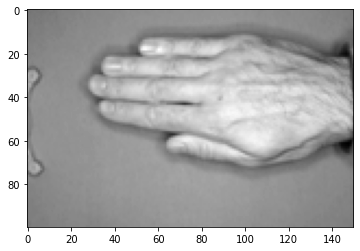

In [61]:
import numpy as np
from google.colab import files
import keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

# predict images
path = "/content/rockpaperscissors/paper/ldGrLw1rlUq1nHuw.png"

img_source = Image.open(path).convert('L').resize((150,100))
imgplot = plt.imshow(img_source, cmap=plt.get_cmap('gray'))
x = image.img_to_array(img_source)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])
classes = model.predict(images, batch_size = 10)

print(path)
if classes[0, 0] == 1:
  print('paper')
elif classes[0, 1] == 1:
  print('rock')
elif classes[0, 2] == 1:
  print('scissors')

In [63]:
model_json = model.to_json()

with open("model1/model.json","w") as model_json_file:
    model_json_file.write(model_json)
    
model.save_weights("model1/model_weights.h5")
print("model saved")

model saved
